In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
# -------------------------------------------------------------------------

In [2]:
BlackFridayTrain = pd.read_csv('train.csv')

In [3]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({0: 'unmarried', 1: 'married'})
# BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [4]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [5]:
# dummy = pd.get_dummies(BlackFridayTrain['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTrain['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTrain['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTrain['Occupation'])

In [6]:
# BlackFridayTrain = BlackFridayTrain.drop(['Gender','City_Category', 'Marital_Status', 'Occupation'], axis=1)

In [7]:
# BlackFridayTrain = pd.concat([BlackFridayTrain, dummy, dummy1, dummy2, dummy3], axis = 1)

In [8]:
# BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [9]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [10]:
BlackFridayTrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Purchase                      550068 non-null int64
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB


In [12]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
BlackFridayTrain.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', yTitle='Total Purchase Amount', title='Total Purchase by Gender')

PlotlyRequestError: No message

In [ ]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [ ]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data")

In [ ]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data")

In [15]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2


BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

In [16]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [17]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [19]:
ageVsGender = BlackFridayTrainNew.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

In [20]:
ageVsGender

Gender,0,1
Age,,
0,42385978,92527205
1,205475842,708372833
2,442976233,1588794345
3,243438963,783130921
4,116706864,304136539
5,89465997,277633647
6,45782765,154984610


In [21]:
ageVsGender.iplot(kind='bar', title="Gender Distribution across various Age Groups")

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

In [23]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [24]:
BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [25]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

In [26]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [27]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [28]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

In [29]:
BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [30]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

In [31]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

In [50]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [53]:
cols = list(BlackFridayTrainNew)
# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score',
 'Purchase']

In [57]:
# use loc to reorder
BlackFridayTrainNew = BlackFridayTrainNew.loc[:, cols]
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [8]:
BlackFridayTrainNew.to_csv('BlackFridayTrainNew.csv')

NameError: name 'BlackFridayTrainNew' is not defined

In [ ]:
BlackFridayTrainNew.corr()

In [5]:
import seaborn as sb
C_mat = BlackFridayTrainNew.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

NameError: name 'BlackFridayTrainNew' is not defined

In [9]:
BlackFridayTrainNew = pd.read_csv('BlackFridayTrainNew.csv')

In [10]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [11]:
X.head()

,Unnamed: 0,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,0,1000001,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113
1,1,1000001,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113
2,2,1000001,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113
3,3,1000001,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113
4,4,1000002,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049


In [ ]:
X.shape

In [12]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

### Testing on Model on Actual Data

In [34]:
BlackFridayTest = pd.read_csv('test.csv')

In [35]:
BlackFridayTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [36]:
BlackFridayTest['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTest['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTest['Product_Category_2'] = BlackFridayTest['Product_Category_2'].astype(int)
BlackFridayTest['Product_Category_3'] = BlackFridayTest['Product_Category_3'].astype(int)

In [37]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({0: 'unmarried', 1: 'married'})

In [38]:
# dummy = pd.get_dummies(BlackFridayTest['Gender'])
# dummy1 = pd.get_dummies(BlackFridayTest['City_Category'])
# dummy2 = pd.get_dummies(BlackFridayTest['Marital_Status'])
# dummy3 = pd.get_dummies(BlackFridayTest['Occupation'])

In [39]:
# BlackFridayTest = pd.concat([BlackFridayTest, dummy, dummy1, dummy2, dummy3], axis = 1)

In [40]:
# BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [41]:
BlackFridayTestNew = BlackFridayTest.copy(deep=True)

BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '55+', 'Age'] = 6

BlackFridayTestNew.loc[BlackFridayTestNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'C', 'City_Category'] = 2

BlackFridayTestNew['Gender'] = BlackFridayTestNew['Gender'].astype(int)
BlackFridayTestNew['Age'] = BlackFridayTestNew['Age'].astype(int)
BlackFridayTestNew['City_Category'] = BlackFridayTestNew['City_Category'].astype(int)
BlackFridayTestNew['Stay_In_Current_City_Years'] = BlackFridayTestNew['Stay_In_Current_City_Years'].astype(int)

conditions = [
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] == 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTestNew['Category_Count'] = np.select(conditions, choices, default=0)

In [42]:
BlackFridayTestNew['Product_Score'] = 0.0
required_product_data = BlackFridayTestNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,484
1,P00000242,0.0,170
2,P00000342,0.0,105
3,P00000442,0.0,34
4,P00000542,0.0,80


In [43]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

In [44]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'Product_Score', p_score)

In [45]:
BlackFridayTestNew['User_Score'] = 0.0
required_user_data = BlackFridayTestNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,12
1,1000002,0.0,30
2,1000003,0.0,12
3,1000004,0.0,1
4,1000005,0.0,45


In [46]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

In [47]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'User_Score', p_score)

In [48]:
BlackFridayTestNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score
0,1000004,P00128942,1,4,7,1,2,1,1,11,0,2,0.478890,0.002262
1,1000009,P00113442,1,2,17,2,0,0,3,5,0,2,0.141134,0.061086
2,1000010,P00288442,0,3,1,1,4,1,5,14,0,2,0.090470,0.228507
3,1000010,P00145342,0,3,1,1,4,1,4,9,0,2,0.009650,0.228507
4,1000011,P00053842,0,2,1,2,1,0,4,5,12,3,0.258142,0.090498


In [14]:
BlackFridayTestNew.to_csv('BlackFridayTestNew.csv')

NameError: name 'BlackFridayTestNew' is not defined

In [15]:
BlackFridayTestNew = pd.read_csv('BlackFridayTestNew.csv')

In [16]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

### Ridge

In [98]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X,y)
predictions = lassoReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Lasso.csv')

### Lasso

In [97]:
from sklearn.linear_model import Ridge

x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X,y)
predictions = ridgeReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Ridge.csv')

### ElasticNet

In [100]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X,y)
predictions = ENreg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_ElasticNet.csv')

In [62]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [67]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [68]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

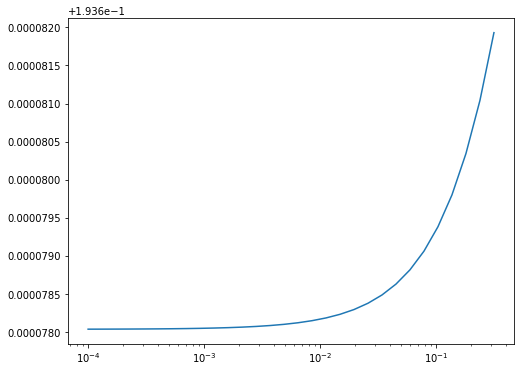

In [69]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

(0.0001, 0.31622776601683794)

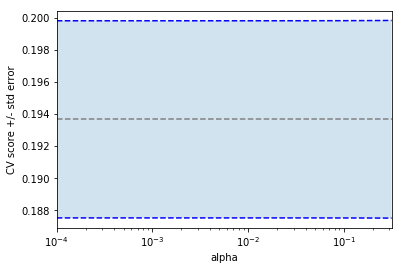

In [72]:
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

## Linear Regression

In [110]:
from sklearn import linear_model

In [113]:
regr = linear_model.LinearRegression(normalize=True)

In [114]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [115]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [116]:
BlackFridayTest = pd.read_csv('test.csv')

In [117]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [118]:
y_pred = regr.predict(x_test)

In [119]:
print(y_pred)

[11941.67597777  9526.76006103  7768.61145259 ... 10290.34879199
  6755.94473756  9251.68923478]


In [120]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [121]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.06417817e-02  4.93597272e+02  1.28775061e+02  4.95602548e+00
  6.42577596e+01  1.17810245e+01 -3.28594930e+01 -2.85961809e+02
 -2.97362471e+01  5.36814156e+01  6.51538822e+02  5.43162919e+03
 -8.91839891e+02]


In [122]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11941.675978
1,1000009,P00113442,9526.760061
2,1000010,P00288442,7768.611453
3,1000010,P00145342,7764.268785
4,1000011,P00053842,10584.738584


In [123]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [124]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

### ExtraTree Regressor

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
eTreeReg = ExtraTreesRegressor(n_estimators=6)

eTreeReg.fit(X,y)

y_pred = eTreeReg.predict(x_test)

In [25]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [26]:
finalsolution.to_csv('finalsolution_eTreeReg.csv')

In [27]:
eTreeReg

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

## Random Forest

In [125]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [126]:
# Train the model on training data
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [127]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [128]:
y_pred = rf.predict(X_test)

In [129]:
print(y_pred)

[14699.  10272.1  6668.8 ...  7716.6 15127.3  2122.8]


In [130]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [131]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [132]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14699.0
1,1000009,P00113442,10272.1
2,1000010,P00288442,6668.8
3,1000010,P00145342,2340.0
4,1000011,P00053842,3161.9


In [133]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

## After adding the product score
### Result - RMSE 3010.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

In [134]:
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [135]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________


In [136]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [137]:
NN_model.fit(X, y, epochs=1, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

Train on 440054 samples, validate on 110014 samples
Epoch 1/1


 42224/440054 [=>............................] - ETA: 9:34:15 - loss: 7736.2773 - mean_absolute_error: 7736.27 - ETA: 1:39:36 - loss: 5597.5719 - mean_absolute_error: 5597.57 - ETA: 23:00 - loss: 4851.0809 - mean_absolute_error: 4851.0809 - ETA: 13:25 - loss: 4674.0490 - mean_absolute_error: 4674.04 - ETA: 9:32 - loss: 4421.9194 - mean_absolute_error: 4421.9194 - ETA: 7:25 - loss: 4320.7949 - mean_absolute_error: 4320.794 - ETA: 6:15 - loss: 4251.4713 - mean_absolute_error: 4251.471 - ETA: 5:22 - loss: 4179.4057 - mean_absolute_error: 4179.405 - ETA: 4:46 - loss: 4180.8609 - mean_absolute_error: 4180.860 - ETA: 4:20 - loss: 4187.0441 - mean_absolute_error: 4187.044 - ETA: 4:01 - loss: 4187.8456 - mean_absolute_error: 4187.845 - ETA: 3:42 - loss: 4137.6603 - mean_absolute_error: 4137.660 - ETA: 3:28 - loss: 4113.4638 - mean_absolute_error: 4113.463 - ETA: 3:15 - loss: 4099.6650 - mean_absolute_error: 4099.665 - ETA: 3:06 - loss: 4103.6780 - mean_absolute_error: 4103.678 - ETA: 2:57 - lo

178384/440054 [===========>..................] - ETA: 51s - loss: 3954.8415 - mean_absolute_error: 3954.84 - ETA: 51s - loss: 3953.9560 - mean_absolute_error: 3953.95 - ETA: 51s - loss: 3953.8704 - mean_absolute_error: 3953.87 - ETA: 51s - loss: 3953.9775 - mean_absolute_error: 3953.97 - ETA: 51s - loss: 3953.4065 - mean_absolute_error: 3953.40 - ETA: 50s - loss: 3953.2732 - mean_absolute_error: 3953.27 - ETA: 50s - loss: 3952.6191 - mean_absolute_error: 3952.61 - ETA: 50s - loss: 3952.7370 - mean_absolute_error: 3952.73 - ETA: 50s - loss: 3953.0118 - mean_absolute_error: 3953.01 - ETA: 50s - loss: 3952.4807 - mean_absolute_error: 3952.48 - ETA: 50s - loss: 3952.6317 - mean_absolute_error: 3952.63 - ETA: 50s - loss: 3952.5568 - mean_absolute_error: 3952.55 - ETA: 50s - loss: 3951.9406 - mean_absolute_error: 3951.94 - ETA: 50s - loss: 3951.5311 - mean_absolute_error: 3951.53 - ETA: 50s - loss: 3951.9980 - mean_absolute_error: 3951.99 - ETA: 50s - loss: 3952.1659 - mean_absolute_error: 3

227184/440054 [==============>...............] - ETA: 42s - loss: 3939.3706 - mean_absolute_error: 3939.37 - ETA: 42s - loss: 3939.4085 - mean_absolute_error: 3939.40 - ETA: 42s - loss: 3939.6653 - mean_absolute_error: 3939.66 - ETA: 41s - loss: 3938.5758 - mean_absolute_error: 3938.57 - ETA: 41s - loss: 3938.7693 - mean_absolute_error: 3938.76 - ETA: 41s - loss: 3938.5715 - mean_absolute_error: 3938.57 - ETA: 41s - loss: 3938.5997 - mean_absolute_error: 3938.59 - ETA: 41s - loss: 3938.0964 - mean_absolute_error: 3938.09 - ETA: 41s - loss: 3937.6677 - mean_absolute_error: 3937.66 - ETA: 41s - loss: 3937.3356 - mean_absolute_error: 3937.33 - ETA: 41s - loss: 3936.9464 - mean_absolute_error: 3936.94 - ETA: 41s - loss: 3936.8983 - mean_absolute_error: 3936.89 - ETA: 41s - loss: 3936.7751 - mean_absolute_error: 3936.77 - ETA: 41s - loss: 3936.4931 - mean_absolute_error: 3936.49 - ETA: 41s - loss: 3935.6732 - mean_absolute_error: 3935.67 - ETA: 41s - loss: 3935.0358 - mean_absolute_error: 3

275808/440054 [=================>............] - ETA: 33s - loss: 3928.9060 - mean_absolute_error: 3928.90 - ETA: 33s - loss: 3929.1323 - mean_absolute_error: 3929.13 - ETA: 33s - loss: 3929.0970 - mean_absolute_error: 3929.09 - ETA: 33s - loss: 3929.0137 - mean_absolute_error: 3929.01 - ETA: 33s - loss: 3929.2645 - mean_absolute_error: 3929.26 - ETA: 33s - loss: 3928.8076 - mean_absolute_error: 3928.80 - ETA: 33s - loss: 3929.3569 - mean_absolute_error: 3929.35 - ETA: 33s - loss: 3929.8976 - mean_absolute_error: 3929.89 - ETA: 33s - loss: 3929.9210 - mean_absolute_error: 3929.92 - ETA: 32s - loss: 3930.2350 - mean_absolute_error: 3930.23 - ETA: 32s - loss: 3930.1191 - mean_absolute_error: 3930.11 - ETA: 32s - loss: 3930.1015 - mean_absolute_error: 3930.10 - ETA: 32s - loss: 3930.2721 - mean_absolute_error: 3930.27 - ETA: 32s - loss: 3930.2035 - mean_absolute_error: 3930.20 - ETA: 32s - loss: 3930.2806 - mean_absolute_error: 3930.28 - ETA: 32s - loss: 3930.1974 - mean_absolute_error: 3

317232/440054 [====================>.........] - ETA: 25s - loss: 3926.0622 - mean_absolute_error: 3926.06 - ETA: 25s - loss: 3925.7940 - mean_absolute_error: 3925.79 - ETA: 25s - loss: 3925.9187 - mean_absolute_error: 3925.91 - ETA: 25s - loss: 3925.9242 - mean_absolute_error: 3925.92 - ETA: 25s - loss: 3925.7771 - mean_absolute_error: 3925.77 - ETA: 25s - loss: 3925.8655 - mean_absolute_error: 3925.86 - ETA: 25s - loss: 3925.8045 - mean_absolute_error: 3925.80 - ETA: 24s - loss: 3925.7362 - mean_absolute_error: 3925.73 - ETA: 24s - loss: 3925.6630 - mean_absolute_error: 3925.66 - ETA: 24s - loss: 3925.3886 - mean_absolute_error: 3925.38 - ETA: 24s - loss: 3925.1866 - mean_absolute_error: 3925.18 - ETA: 24s - loss: 3925.3568 - mean_absolute_error: 3925.35 - ETA: 24s - loss: 3925.3069 - mean_absolute_error: 3925.30 - ETA: 24s - loss: 3925.1614 - mean_absolute_error: 3925.16 - ETA: 24s - loss: 3925.1832 - mean_absolute_error: 3925.18 - ETA: 24s - loss: 3925.2159 - mean_absolute_error: 3

364736/440054 [=======================>......] - ETA: 19s - loss: 3925.5522 - mean_absolute_error: 3925.55 - ETA: 19s - loss: 3925.7412 - mean_absolute_error: 3925.74 - ETA: 19s - loss: 3925.3940 - mean_absolute_error: 3925.39 - ETA: 19s - loss: 3925.1011 - mean_absolute_error: 3925.10 - ETA: 19s - loss: 3925.1438 - mean_absolute_error: 3925.14 - ETA: 19s - loss: 3925.1507 - mean_absolute_error: 3925.15 - ETA: 18s - loss: 3925.3839 - mean_absolute_error: 3925.38 - ETA: 18s - loss: 3925.3759 - mean_absolute_error: 3925.37 - ETA: 18s - loss: 3925.4987 - mean_absolute_error: 3925.49 - ETA: 18s - loss: 3925.5010 - mean_absolute_error: 3925.50 - ETA: 18s - loss: 3925.6634 - mean_absolute_error: 3925.66 - ETA: 18s - loss: 3925.6931 - mean_absolute_error: 3925.69 - ETA: 18s - loss: 3925.7715 - mean_absolute_error: 3925.77 - ETA: 18s - loss: 3925.7583 - mean_absolute_error: 3925.75 - ETA: 18s - loss: 3925.8377 - mean_absolute_error: 3925.83 - ETA: 18s - loss: 3925.8859 - mean_absolute_error: 3

414688/440054 [===========================>..] - ETA: 11s - loss: 3920.8316 - mean_absolute_error: 3920.83 - ETA: 11s - loss: 3920.6682 - mean_absolute_error: 3920.66 - ETA: 11s - loss: 3920.7444 - mean_absolute_error: 3920.74 - ETA: 11s - loss: 3920.6148 - mean_absolute_error: 3920.61 - ETA: 11s - loss: 3920.5602 - mean_absolute_error: 3920.56 - ETA: 11s - loss: 3920.7911 - mean_absolute_error: 3920.79 - ETA: 11s - loss: 3920.5976 - mean_absolute_error: 3920.59 - ETA: 11s - loss: 3920.6442 - mean_absolute_error: 3920.64 - ETA: 11s - loss: 3920.3947 - mean_absolute_error: 3920.39 - ETA: 11s - loss: 3920.4899 - mean_absolute_error: 3920.48 - ETA: 11s - loss: 3920.6683 - mean_absolute_error: 3920.66 - ETA: 11s - loss: 3920.7530 - mean_absolute_error: 3920.75 - ETA: 10s - loss: 3920.6545 - mean_absolute_error: 3920.65 - ETA: 10s - loss: 3920.4656 - mean_absolute_error: 3920.46 - ETA: 10s - loss: 3920.5922 - mean_absolute_error: 3920.59 - ETA: 10s - loss: 3920.5356 - mean_absolute_error: 3

440016/440054 [============================>.] - ETA: 3s - loss: 3919.0131 - mean_absolute_error: 3919.013 - ETA: 3s - loss: 3918.9002 - mean_absolute_error: 3918.900 - ETA: 3s - loss: 3919.0814 - mean_absolute_error: 3919.081 - ETA: 3s - loss: 3919.0492 - mean_absolute_error: 3919.049 - ETA: 3s - loss: 3919.0501 - mean_absolute_error: 3919.050 - ETA: 3s - loss: 3919.0896 - mean_absolute_error: 3919.089 - ETA: 3s - loss: 3918.8765 - mean_absolute_error: 3918.876 - ETA: 3s - loss: 3918.8351 - mean_absolute_error: 3918.835 - ETA: 3s - loss: 3918.7888 - mean_absolute_error: 3918.788 - ETA: 3s - loss: 3918.5320 - mean_absolute_error: 3918.532 - ETA: 3s - loss: 3918.4707 - mean_absolute_error: 3918.470 - ETA: 3s - loss: 3918.5378 - mean_absolute_error: 3918.537 - ETA: 3s - loss: 3918.2520 - mean_absolute_error: 3918.252 - ETA: 3s - loss: 3918.1511 - mean_absolute_error: 3918.151 - ETA: 3s - loss: 3918.2170 - mean_absolute_error: 3918.217 - ETA: 2s - loss: 3918.2005 - mean_absolute_error: 39

In [138]:
# Load wights file of the best model :
wights_file = 'Weights-005--3903.65557.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for Weights-005--3903.65557.hdf5

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_TensorFlow.csv')

## XGBoost

In [101]:
import xgboost

In [102]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Category_Count                550068 non-null int32
Product_Score                 550068 non-null float64
User_Score                    550068 non-null float64
dtypes: float64(2), int32(7), int64(4)
memory usage: 39.9 MB


In [104]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [105]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [106]:
predictions = xgb.predict(x_test)

In [107]:
xgboostsolution = BlackFridayTestNew[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

In [108]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10438.294530
1,1000009,P00113442,9713.420537
2,1000010,P00288442,8728.293292
3,1000010,P00145342,9012.943524
4,1000011,P00053842,10880.052661


In [109]:
xgboostsolution.to_csv('finalsolution_XGBoost.csv')

### rmse - 2779.something with 
### rank - 580 among 13000+ participants

In [73]:
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.192-b12, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l
  JVM stdout: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.out
  JVM stderr: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_vivid_fzd67x
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [74]:
train = h2o.import_file("BlackFridayTrainNew.csv")
test = h2o.import_file("BlackFridayTestNew.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [76]:
from h2o.automl import H2OAutoML

In [79]:
x = train.columns
y = 'Purchase'
x.remove('Purchase')

In [80]:
x

['C1',
 'User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score']

In [81]:
aml = H2OAutoML(max_models= 5, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [82]:
preds = aml.leader.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning:

Test/Validation dataset column 'Product_ID' has levels not trained on: [P00012642, P00013042, P00030342, P00038942, P00039042, P00042642, P00056942, P00058842, P00061642, P00062242, P00062542, P00063942, P00074942, P00077642, P00082142, P00082642, P00092742, P00100242, P00105742, P00106242, P00140842, P00156942, P00165542, P00166542, P00168242, P00172942, P00204642, P00227242, P00236842, P00239542, P00249942, P00253842, P00268942, P00270342, P00279042, P00294942, P00300142, P00306842, P00309842, P00312642, P00315342, P00322642, P00322842, P00336842, P00359842, P0099542]



In [88]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20181203_151940


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6532575.379125178
RMSE: 2555.8903300269317
MAE: 1897.4499153815755
RMSLE: NaN
Mean Residual Deviance: 6532575.379125178

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 6826208.214071142
RMSE: 2612.701325079302
MAE: 1938.8103352650348
RMSLE: NaN
Mean Residual Deviance: 6826208.214071142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 6723164.146122221
RMSE: 2592.9065054726175
MAE: 1922.8079390311614
RMSLE: NaN
Mean Residual Deviance: 6723164.146122221
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1922.808,4.1943297,1933.6583,1916.7107,1920.0469,1924.2003,1919.4235
mean_residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
mse,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
r2,0.7332429,0.0010473,0.7315218,0.7348315,0.7343926,0.7313848,0.734084
residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
rmse,2592.8955,5.33433,2605.6821,2589.2986,2585.2725,2597.0508,2587.1738
rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-12-03 15:55:57,2 min 53.765 sec,0.0,5020.3211013,4067.9847648,25203623.9601907,5047.6884131,4090.1236340,25479158.3156621
,2018-12-03 15:55:58,2 min 55.024 sec,5.0,3880.9232210,3073.8307506,15061565.0473033,3907.3808312,3098.2221413,15267624.9603562
,2018-12-03 15:55:59,2 min 56.212 sec,10.0,3228.0604900,2491.4599094,10420374.5269248,3253.9278499,2513.8243903,10588046.4524495
,2018-12-03 15:56:01,2 min 57.393 sec,15.0,2978.4281829,2273.3338660,8871034.4408518,3004.3430179,2295.1264502,9026076.9691795
,2018-12-03 15:56:02,2 min 58.664 sec,20.0,2829.8676699,2143.5676036,8008151.0293037,2855.3498285,2164.0618579,8153022.6433340
---,---,---,---,---,---,---,---,---,---
,2018-12-03 15:56:22,3 min 18.633 sec,115.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 18.876 sec,120.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 19.114 sec,125.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:23,3 min 19.353 sec,130.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Product_Category_1,32603851718656.0000000,1.0,0.7702031
Product_Score,3225105989632.0000000,0.0989179,0.0761869
Product_ID,2815588040704.0000000,0.0863575,0.0665128
Product_Category_3,1271207428096.0000000,0.0389895,0.0300298
Product_Category_2,705914077184.0000000,0.0216512,0.0166759
User_Score,413632561152.0000000,0.0126866,0.0097713
C1,359006535680.0000000,0.0110112,0.0084808
User_ID,279450681344.0000000,0.0085711,0.0066015
Category_Count,178585583616.0000000,0.0054774,0.0042187
Occupation,141283786752.0000000,0.0043333,0.0033376


In [89]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_2_AutoML_20181203_151940,6.72316e+06,2592.91,6.72316e+06,1922.81,nan
GBM_1_AutoML_20181203_151940,6.8175e+06,2611.04,6.8175e+06,1936.83,nan
DRF_1_AutoML_20181203_151940,7.08744e+06,2662.22,7.08744e+06,1972.79,0.346743
StackedEnsemble_AllModels_AutoML_20181203_151940,7.12559e+06,2669.38,7.12559e+06,2005.89,0.426528
XRT_1_AutoML_20181203_151940,7.20138e+06,2683.54,7.20138e+06,1998.28,0.354257
StackedEnsemble_BestOfFamily_AutoML_20181203_151940,7.36988e+06,2714.75,7.36988e+06,2051.74,0.448205
GLM_grid_1_AutoML_20181203_151940_model_1,2.52033e+07,5020.29,2.52033e+07,4067.96,0.764076


In [83]:
y_pred = preds.as_data_frame()

In [84]:
y_pred.head()

,predict
0,16527.482427
1,11236.480297
2,6519.440419
3,2845.092719
4,2788.020899


In [85]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [86]:
finalsolution.to_csv('finalsolution_H2O.csv')

### Rank		498		Score	2662.3541039426	Submission Trend	
